In [1]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import scipy as sp
import scipy.linalg
import sympy as sy
sy.init_printing() 
import warnings
warnings.filterwarnings("ignore")

In [12]:
import linAlgVis

# <font face="gotham" color="purple"> Basis </font>

## <font face="gotham" color="purple"> Basis of $\mathbb{R}^2$ </font>

<font face="gotham" color="red">Basis</font>, denoted as <font face="gotham" color="red">$B$</font>, is the user-customization of coordinates. 

Formally speaking, it is a set of vectors of vector space $V$ satisfied two conditions:
1. All vectors in $B$ are independent. 
2. $\text{span}(B)=V$

We have seen standard basis in earlier chapters, for instance in $\mathbb{R}^2$

$$e_1=
\left[
\begin{matrix}
1\\0
\end{matrix}
\right],
\ e_2=\left[
\begin{matrix}
0\\1
\end{matrix}
\right]
$$

and in $\mathbb{R}^3$

$$e_1=
\left[
\begin{matrix}
1\\0\\0
\end{matrix}
\right],
\ e_2=\left[
\begin{matrix}
0\\1\\0
\end{matrix}
\right],
\ e_3=\left[
\begin{matrix}
0\\0\\1
\end{matrix}
\right]
$$

Here we show the linear combination of standard basis for vector $(3, 6)$

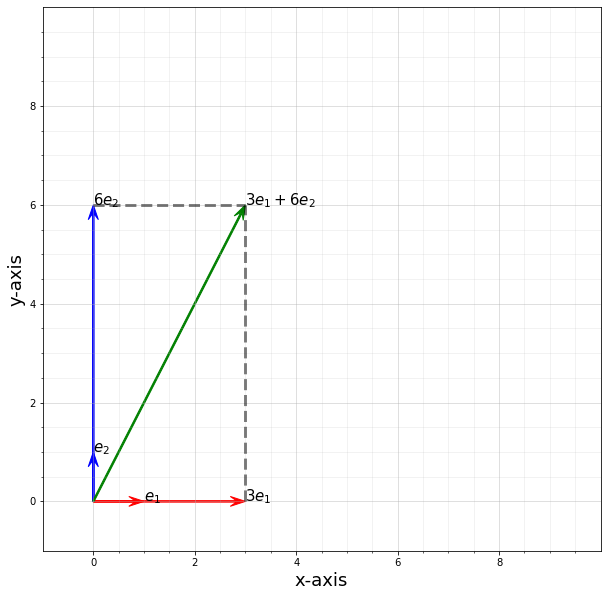

In [6]:
fig, ax = plt.subplots(figsize = (10, 10))

arrows = np.array([[[0,0,1,0]],
                  [[0,0,0,1]],
                  [[0,0,3,0]],
                  [[0,0,0,6]],
                  [[0,0,3,6]]])

colors = ['r','b','r','b','g']
for i in range(arrows.shape[0]):
    X,Y,U,V = zip(*arrows[i,:,:])
    ax.arrow(X[0], Y[0], U[0], V[0], color = colors[i], width = .03, 
             length_includes_head = True,
             head_width = .2, # default: 3*width
             head_length = .3,
             overhang = .4)

############################Dashed##################################
line1 = np.array([[3, 0], [3, 6]])
ax.plot(line1[:,0], line1[:,1], ls = '--', lw = 3, color = 'black', alpha = .5)

line2 = np.array([[0, 6], [3, 6]])
ax.plot(line2[:,0], line2[:,1], ls = '--', lw = 3, color = 'black', alpha = .5)

############################Text#####################################

ax.text(0, 1, '$e_2$', size = 15)
ax.text(1, 0, '$e_1$', size = 15)

ax.text(0, 6, '$6e_2$', size = 15)
ax.text(3, 0, '$3e_1$', size = 15)

ax.text(3, 6, '$3e_1+6e_2$', size = 15)

###########################Grid Setting##############################
# Major ticks every 20, minor ticks every 5
major_ticks = np.arange(0, 10, 2)
minor_ticks = np.arange(0, 10, .5)

ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)

ax.set_yticks(major_ticks)
ax.set_yticks(minor_ticks, minor=True)

ax.grid(which='both')
ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.5)

#######################################################################
ax.set_xlabel('x-axis', size = 18)
ax.set_ylabel('y-axis', size = 18)
ax.axis([-1, 10, -1, 10])
plt.show()

But non-standard basis is what we are mostly interested in, we can show that $(2, 1)$ and $(-1, 2)$ is a basis for $\mathbb{R}^2$.

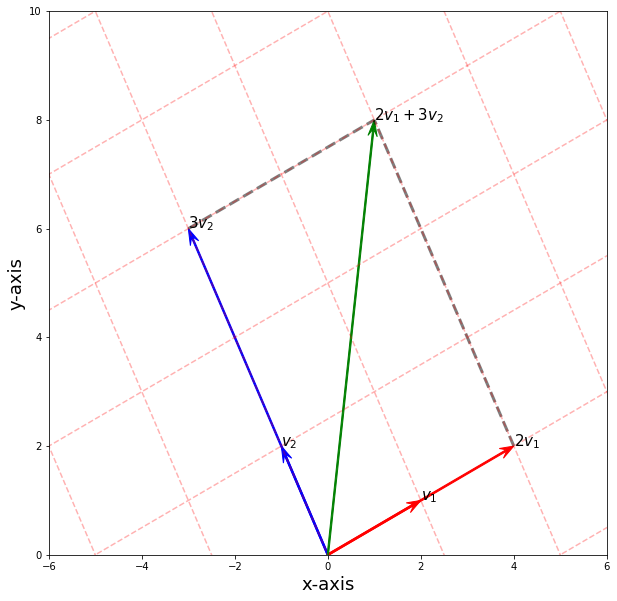

In [7]:
fig, ax = plt.subplots(figsize = (10, 10))

v1 = np.array([2, 1])
v2 = np.array([-1, 2])
v1m2 = 2*v1
v2m3 = 3*v2

arrows = np.array([[[0, 0, v1[0], v1[1]]],
               [[0, 0, v2[0], v2[1]]],
               [[0, 0, 2*v1[0], 2*v1[1]]],
               [[0, 0, 3*v2[0], 3*v2[1]]],
               [[0, 0, (v1m2+v2m3)[0],(v1m2+v2m3)[1]]]])

colors = ['r','b','r','b','g']
for i in range(arrows.shape[0]):
    X,Y,U,V = zip(*arrows[i,:,:])
    ax.arrow(X[0], Y[0], U[0], V[0], color = colors[i], width = .03, 
             length_includes_head = True,
             head_width = .2, # default: 3*width
             head_length = .3,
             overhang = .4)

# ############################ Dashed ##################################

point1 = [v2m3[0], v2m3[1]]
point2 = [v2m3[0]+v1m2[0], v2m3[1]+v1m2[1]]
line = np.array([point1, point2])
ax.plot(line[:,0], line[:,1], ls = '--', lw = 3, color = 'black', alpha = .5)

point1 = [v1m2[0], v1m2[1]]
point2 = [v2m3[0]+v1m2[0], v2m3[1]+v1m2[1]]
line = np.array([point1, point2])
ax.plot(line[:,0], line[:,1], ls = '--', lw = 3, color = 'black', alpha = .5)

############################Text#####################################

ax.text(2, 1, '$v_1$', size = 15)
ax.text(-1, 2, '$v_2$', size = 15)

ax.text(v1m2[0],v1m2[1], '$2v_1$', size = 15)
ax.text(v2m3[0],v2m3[1], '$3v_2$', size = 15)

ax.text(v1m2[0]+v2m3[0],v1m2[1]+v2m3[1], '$2v_1+3v_2$', size = 15)
############################## Grid ###############################

t = np.linspace(-6, 6)
for k in range(-6, 7):
    x = 2*k - t
    y = k + 2*t
    ax.plot(x, y, ls = '--', color = 'red', alpha = .3)

for k in range(-6, 7):
    x = -k+2*t
    y = 2*k+t
    ax.plot(x, y, ls = '--', color = 'red', alpha = .3)

#######################################################################
ax.set_xlabel('x-axis', size = 18)
ax.set_ylabel('y-axis', size = 18)
ax.axis([-6,6, 0, 10]) # np.linalg.norm(v1m2+v2m3) is intercept
plt.show()

Not matter the basis is standard or not, as long as they are independent, they span $\mathbb{R}^2$.

## <font face="gotham" color="purple"> Basis of $\mathbb{R}^3$</font>

Next we show the standard basis and a non-standard basis of $\mathbb{R}^3$.

The standard basis in $\mathbb{R}^3$ is 

$$
(e_1, e_2, e_3)=
\left[
\begin{matrix}
1 & 0 & 0\\
0 & 1 & 0\\
0 & 0 & 1
\end{matrix}
\right]
$$

and we can show a vector $(2,3,4)$ in $\mathbb{R}^3$ is a linear combination of them. We did a 3D linear combination plot in lecture 6, here we just reproduce it by importing the module at the top of the note.

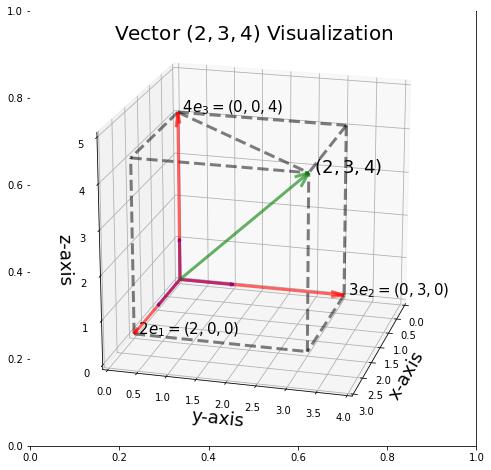

In [8]:
linAlgVis.linearCombo(2,3,4)

Next we show the linear combination of a non-standard basis, $(2,1,0), (0,3,1), (0,0,3)$. I also wrote another function ```linearComboNonStd``` in the ```linAlgVis``` module.

<IPython.core.display.Javascript object>


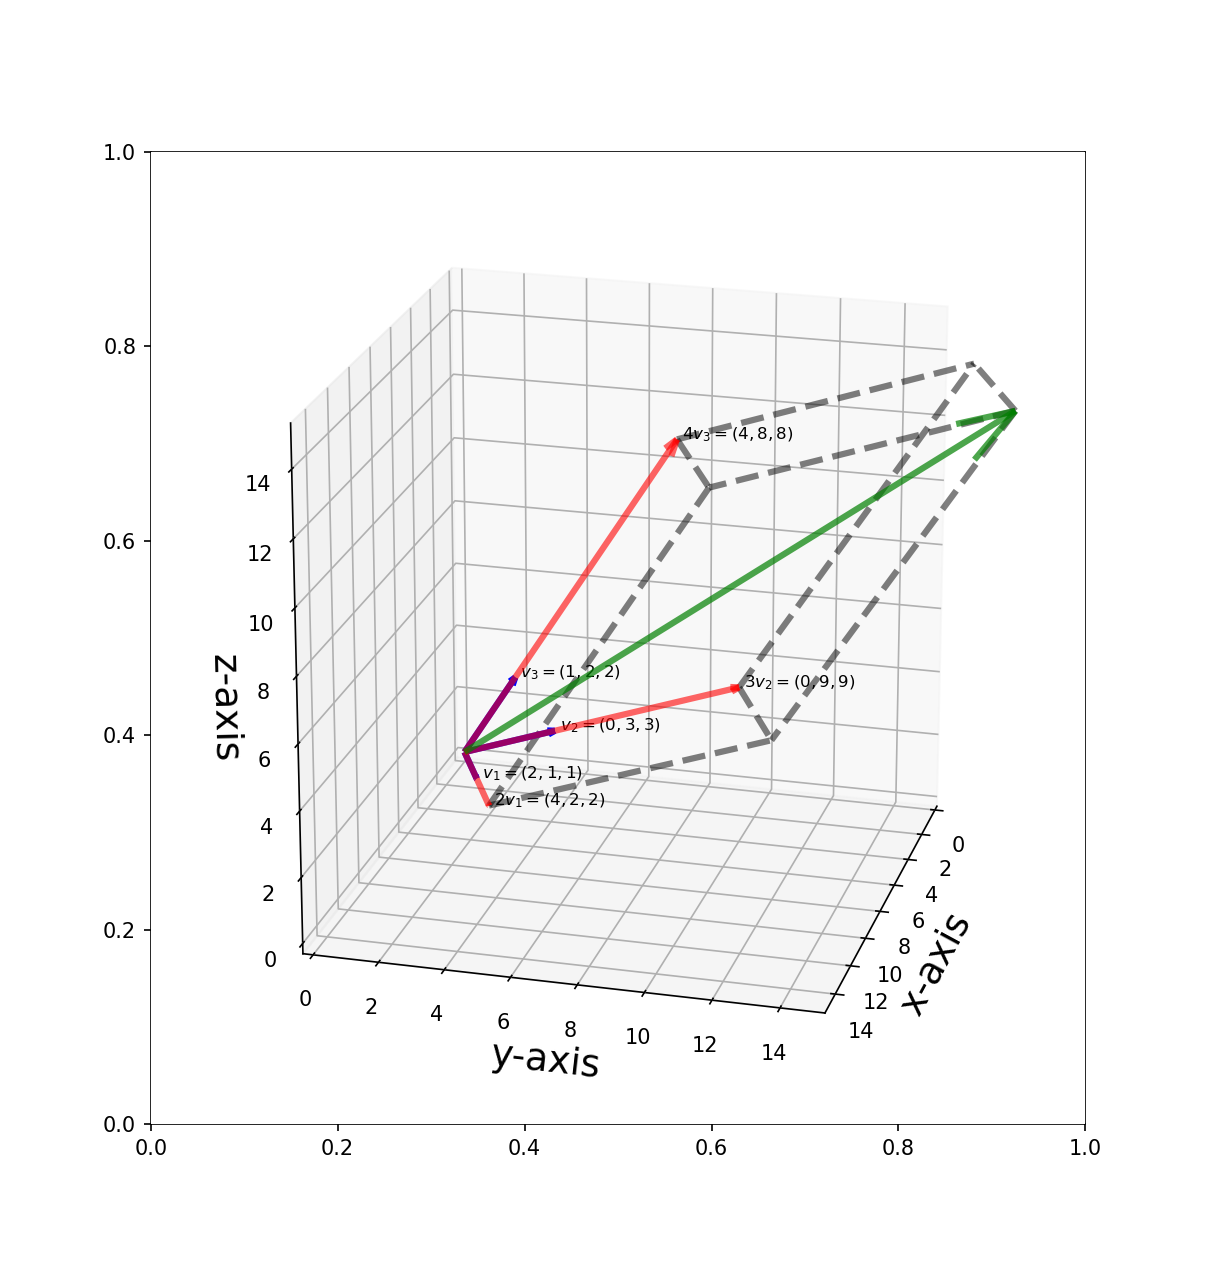

In [13]:
a, b, c = 2, 3, 4
vec1 = np.array([2,1,0])
vec2 = np.array([0,3,1])
vec3 = np.array([1,2,3])
linAlgVis.linearComboNonStd(2,3,4, vec1, vec2, vec3)

# <font face="gotham" color="purple"> Dimension</font>

If $B$ is the basis for $V$, then the number of vectors in $B$ is the <font face="gotham" color="red"> dimension</font> of $V$, denoted as $\text{dim}(V)$.

<font size = 4 face="gotham" color="red"> Theorem 1</font>

Let $B$ be the basis of $V$, $B$ has $n$ vectors, and $T$ is a set of vectors in $V$, if $T$ has $p$ vectors that $p>n$, then $T$ must be linearly dependent.

<font size = 4 face="gotham" color="red"> Theorem 2</font>

If $B$ and $T$ are basis of $V$ then $B$ and $T$ must have the same number of vectors which is the $\text{dim}(V)$.

<font size = 4 face="gotham" color="red"> Theorem 3</font>

$\text{dim}(V) = n$ and $S$ is a set of vectors from $V$ with $n$ linearly independent vectors, then $\text{span}(S)=V$.

<font size = 4 face="gotham" color="red"> Theorem 4</font>

Let $v_1, v_2, ...,v_n$ be a set of vectors in the vector space $V$ and let $W = \text{span}\{v_1,v_2,...,v_n\}$. If $v_n$ is a linear combination of $v_1, v_2,...v_{n-1}$, then $W = \text{span}\{v_1,v_2,...,v_{n-1}\}$ 

These theorems are self-explanatory, we will not waste time in proving them.

# <font face="gotham" color="purple"> Column Space</font>

Columns space <font face="gotham" color="red">$\text{Col}A$</font> is the space spanned by all columns of a matrix.

 <font size = 4 face="gotham" color="red">Important Fact </font>

Row operations will not change the dependence of the columns of a matrix.

Let's say we have a matrix $A$

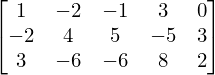

In [14]:
A = sy.Matrix([[1, -2, -1, 3, 0], [-2, 4, 5, -5, 3], [3, -6, -6, 8, 2]]);A

Perform ```rref``` operations, and dependence of $\text{Col}A$ reserved.

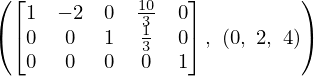

In [208]:
A.rref()

The $2nd$ and the $4th$ column are the linear combination of other vectors, it is safe remove them without tampering the column space. Therefore the $\text{Col}A$ is 

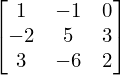

In [17]:
ColA = sy.Matrix([[1, -1,  0], [-2,  5,  3], [3, -6, 2]]); ColA

## <font face="gotham" color="purple"> Column Spaces Aren't the Same</font>

Did you notice there was a catch when we say the dependency of $\text{Col}A$ was not affect by row operations, however we did not say the column spaces are the same before and after the row operations.

Actually, they can never be the same. 

Consider the matrix $A$:

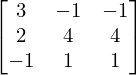

In [19]:
A = sy.Matrix([[3, -1, -1],[2, 4, 4], [-1, 1, 1]]); A

If we perform ```rref```, $A$ is turned into $B$. Apparently the column space of them are different.

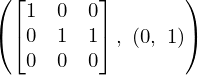

In [21]:
B = A.rref(); B

Now list the basis of their column spaces: are $\text{Col}A$ and $\text{Col}B$ the same?

$$
\text{col}(A)=\text{span}\left\{\left[ \matrix{3\cr 2\cr -1}\right],\ \left[\matrix{-1\cr 4\cr 1}\right]\right\}
$$
$$
\text{col}(B)=\text{span}\left\{\left[ \matrix{1\cr 0\cr 0}\right],\ \left[\matrix{0\cr 1\cr 0}\right]\right\}
$$

It's easy to visualize them, they are two intersecting planes.

<IPython.core.display.Javascript object>


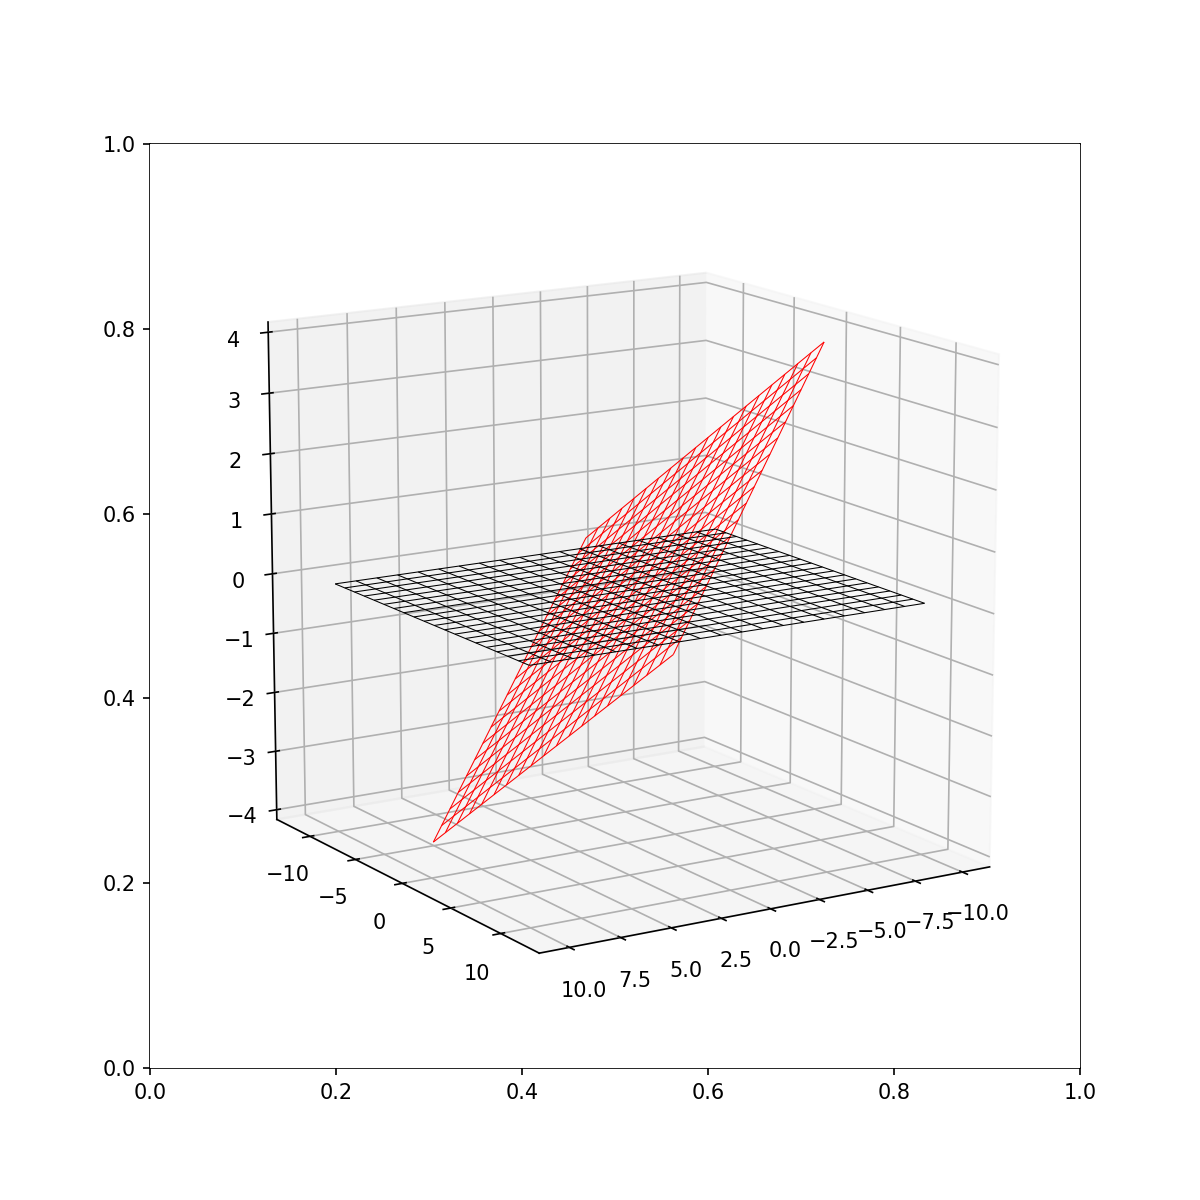

In [23]:
fig, ax = plt.subplots(figsize= (8, 8))
ax = fig.gca(projection='3d')

s = np.linspace(-2, 2, 20)
t = np.linspace(-2, 2, 20)
S, T = np.meshgrid(s, t)

X = 3*S - T
Y = 2*S + 4*T
Z = -S + T
ax.plot_wireframe(X, Y, Z, linewidth = .5, color = 'r')

s = np.linspace(-10, 10, 20)
t = np.linspace(-10, 10, 20)
S, T = np.meshgrid(s, t)
X = S
Y = T
Z = np.zeros(S.shape)
ax.plot_wireframe(X, Y, Z, linewidth = .5, color = 'k')
ax.view_init(elev=14, azim=58)

## <font face="gotham" color="purple"> Method for Finding Basis of $\mathbb{R}^n$</font>

Consider matrix $A_{4\times 2}$, find a basis for $\mathbb{R}^4$.

Note that we only have two column vectors, not possible to span $\mathbb{R}^4$. The method is to use another two standard basis vector combined with $A$ to form the basis of $\mathbb{R}^4$.

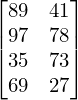

In [27]:
A = sy.randMatrix(4, 2);A

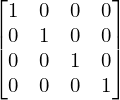

In [28]:
I = sy.eye(4);I

Concatenate the matrix horizontally.

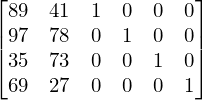

In [29]:
Aug = A.row_join(I);Aug# concatenate 

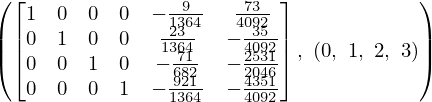

In [30]:
Aug.rref()

Therefore the first 4 columns of augmented matrix is a basis.

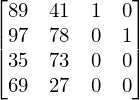

In [31]:
Aug[:,0:4]

# <font face="gotham" color="purple"> Change of Basis</font>

## <font face="gotham" color="purple"> Coordinate Vector</font>

We have a basis $B=\{b_1, b_2\}$, and $B$'s coordinate vector is denoted as $\big[v\big]_B$. If

$$
b_1 = \left[\begin{matrix}1\\1 \end{matrix}\right]\\
b_2 = \left[\begin{matrix}-2\\1 \end{matrix}\right]\\
\big[v\big]_B = \left[\begin{matrix}2\\3 \end{matrix}\right]
$$

Then compute $v$ by using the basis and its coordinate vectors.

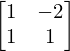

In [32]:
P = sy.Matrix([[1,-2],[1,1]]); P

In [33]:
v_B = sy.Matrix([[2], [3]]); v_B

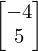

In [34]:
P*v_B

This is simple already.

What if we know $v$, and we want to find out $\big[v\big]_B$, for instance

$$
v = \left[\begin{matrix}-1\\-4 \end{matrix}\right]
$$

Then we can formulate the question as:

$$
\left[\begin{matrix}1 & -2\\1 & 1\end{matrix}\right]
\left[\begin{matrix}c_1\\c_2 \end{matrix}\right]=
\left[\begin{matrix}-1\\-4 \end{matrix}\right]
$$

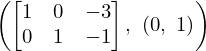

In [248]:
Aug = sy.Matrix([[1,-2,-1],[1,1,-4]])
Aug.rref()

We get $\big[v\big]_B = (-3, -1)^T$.

## <font face="gotham" color="purple"> Change of Basis</font>

We have two bases $B=\{b_1,\ b_2\}$, $C=\{c_1,\ c_2\}$ for $\mathbb{R}^2$.

$$
b_1=
\left[\begin{matrix}2\\1 \end{matrix}\right],\quad
b_2 = 
\left[\begin{matrix}-1\\1 \end{matrix}\right]\\
c_1=
\left[\begin{matrix}1\\1 \end{matrix}\right],\quad
c_2 = 
\left[\begin{matrix}-3\\1 \end{matrix}\right]\\
$$

The question is if we know $\big[v\big]_B$, how to find out $\big[v\big]_C$.  

This question is reformulated as finding transition matrix $P_{C\leftarrow B}$.

First we find coordinate vectors for $b_1$ and $b_2$ in $C: b_1 = xc_1+yc_2$, $b_2 = xc_1+yc_2$.

$$
\left[\begin{matrix}2\\1 \end{matrix}\right] = x\left[\begin{matrix}1\\1 \end{matrix}\right]+y\left[\begin{matrix}-3\\1 \end{matrix}\right]= \left[\begin{matrix}1 & -3\\1 &1 \end{matrix}\right]\left[\begin{matrix}x \\y \end{matrix}\right]\\
\left[\begin{matrix}-1\\1 \end{matrix}\right] = x\left[\begin{matrix}1\\1 \end{matrix}\right]+y\left[\begin{matrix}-3\\1 \end{matrix}\right]=\left[\begin{matrix}1 & -3\\1 &1 \end{matrix}\right]\left[\begin{matrix}x \\y \end{matrix}\right]\\
$$

Extract augmented matrix for both system:

$$
\left[\begin{matrix}1 & -3 & 2\\1 &1 &1 \end{matrix}\right]\\
\left[\begin{matrix}1 & -3 & -1\\1 &1 &1 \end{matrix}\right]
$$

They can be combined into one augmented matrix $[C|B]$

$$
\left[\begin{matrix}1 & -3  & 2 & -1\\1 &1 &1 &1 \end{matrix}\right]
$$

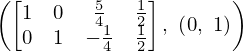

In [250]:
Aug = sy.Matrix([[1,-3,2,-1],[1, 1, 1, 1]])
Aug.rref()

The last two columns of rref augmented matrix is the $P_{C\leftarrow B}$.

In general, we can find transition matrix by using

$$[\ C\ |\ B\ ]\longrightarrow [\ I\ |\ P_{C\leftarrow B}\ ]$$

### <font face="gotham" color="purple"> An Example</font>

Let 

$$
B=\left\{\pmatrix{1\cr 1\cr 0},\ \pmatrix{0\cr 1\cr 1},\ \pmatrix{0\cr 1\cr 0}\right\}\qquad\text{and}\qquad C=\left\{\pmatrix{1\cr 1\cr 2},\ \pmatrix{2\cr 1\cr 1},\ \pmatrix{1\cr 0\cr 1}\right\}
$$

be two bases for $\mathbb{R}^3$, find the $P_{C\leftarrow B}$ and given $\big[v\big]_B = (1,-1,2)$, find $\big[v\big]_C$.

Construct augmented matrix:

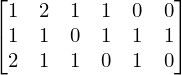

In [37]:
B = sy.Matrix([[1, 0, 0], [1, 1 ,1], [0, 1, 0]])
C = sy.Matrix([[1, 2, 1], [1, 1 ,0], [2, 1, 1]])
Aug = C.row_join(B); Aug# concatenate 

The RHS block of rref is $P_{C\leftarrow B}$.

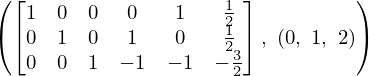

In [40]:
Aug_rref = Aug.rref();Aug_rref

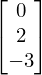

In [53]:
v_C = Aug_rref[0][:,3:6]*v_B; v_C

The $\big[v\big]_C$ is $(0, 2, -3)$.